# Wavefront Propagation and PSF simulation with Scoob
The scoobPSF package builds a layer on-top of poppy that is specific to the scoob optical bench.
This notebook demonstrates how to simulate monochromatic PSFs and wavefronts with the scoobPSF package. <br>


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import scoobpsf
from scoobpsf.math_module import xp, _scipy
from scoobpsf.imshows import *
from scoobpsf import scoob

In [54]:
reload(scoob)
model = scoob.SCOOBM()
# model.d_oap7_CAM += -0.01*u.mm

No OPD data implemented into model.
Using default Gaussian influence function.
Using reflection when computing OPD.


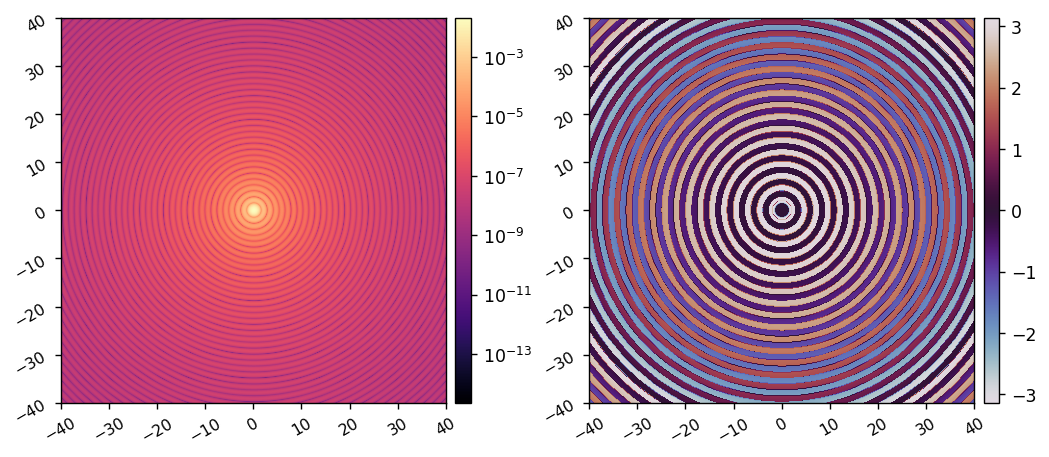

In [55]:
imwf = model.calc_wf(plot=True)

In [5]:
3 + 22.6 + 5.9 + 28.5 + 1.408853021810126E+002

200.8853021810126

In [8]:
228.6*2, 914.4/2

(457.2, 457.2)

No OPD data implemented into model.
Using default Gaussian influence function.
Using reflection when computing OPD.
Propagating wavelength 632.800 nm.
PSF calculated in 0.144s


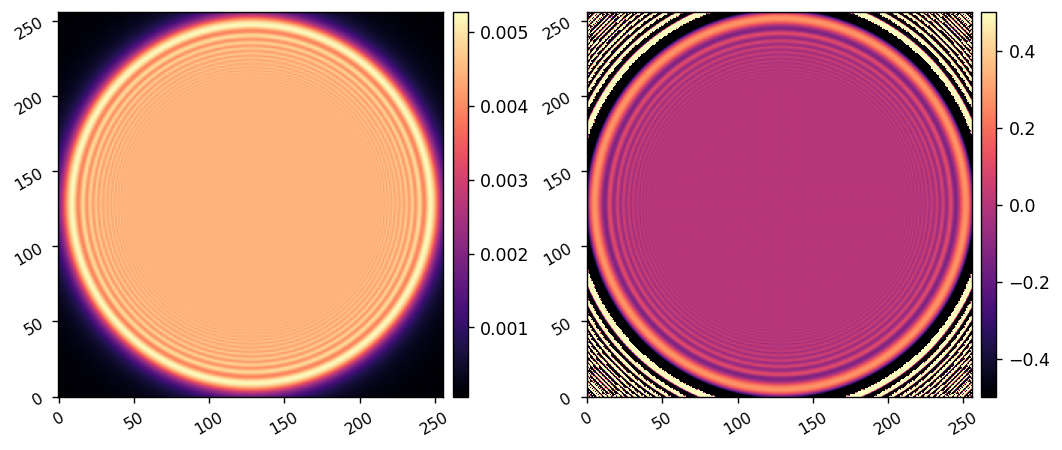

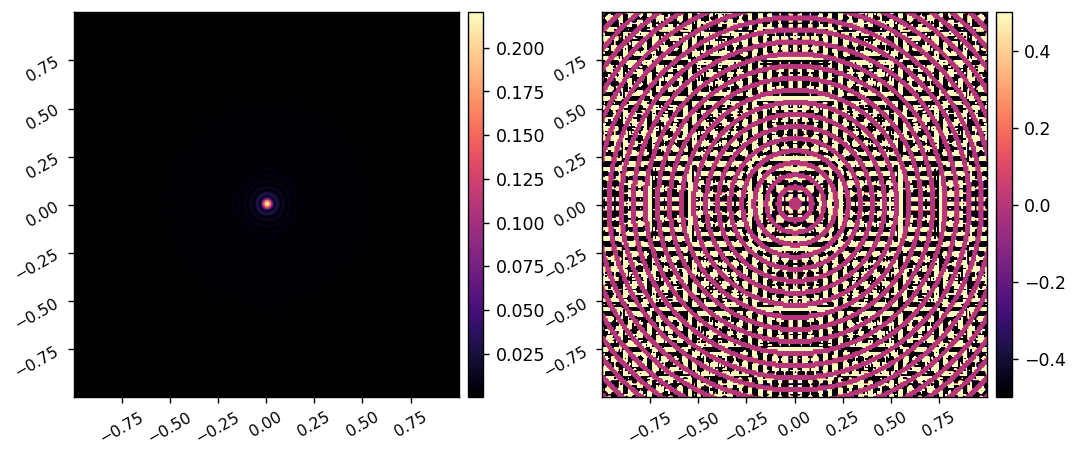

In [56]:
reload(scoob)
model = scoob.SCOOBM()
wfs = model.calc_wfs()

imshow2(wfs[4].amplitude, wfs[4].phase, npix=model.npix, vmin2=-0.5, vmax2=0.5)
imshow2(wfs[7].amplitude, wfs[7].phase, npix=model.npix, vmin2=-0.5, vmax2=0.5, pxscl=wfs[7].pixelscale.to(u.mm/u.pix))

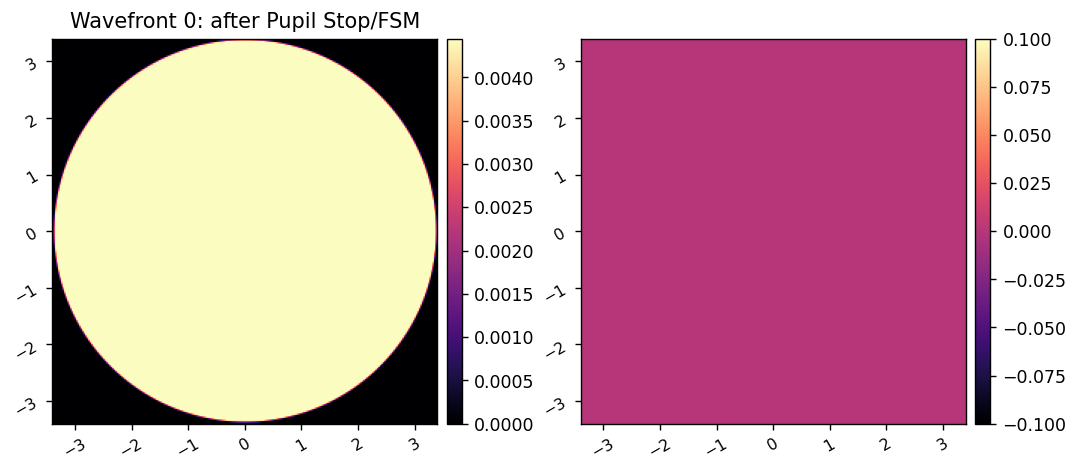

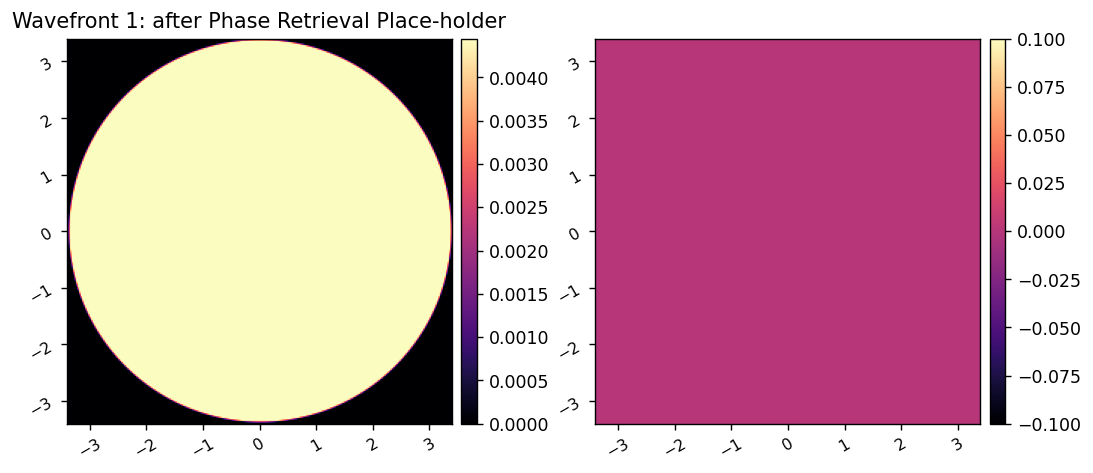

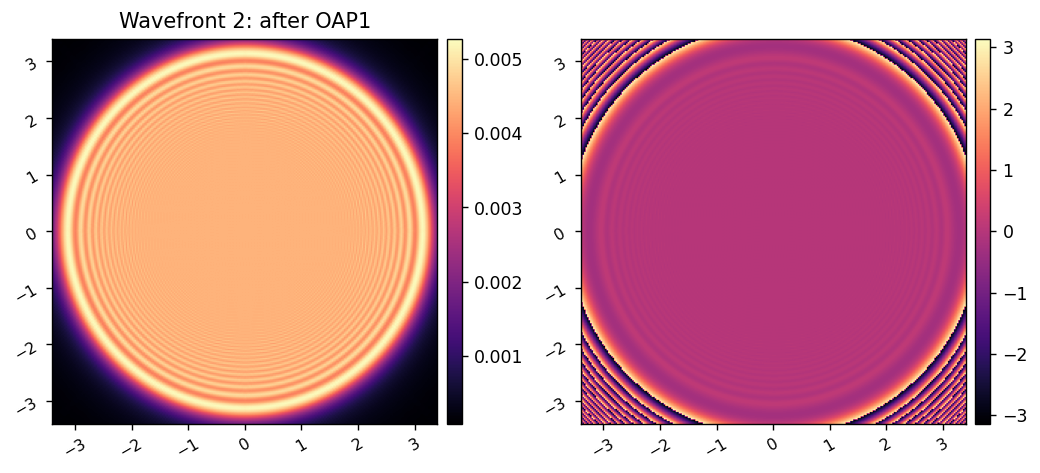

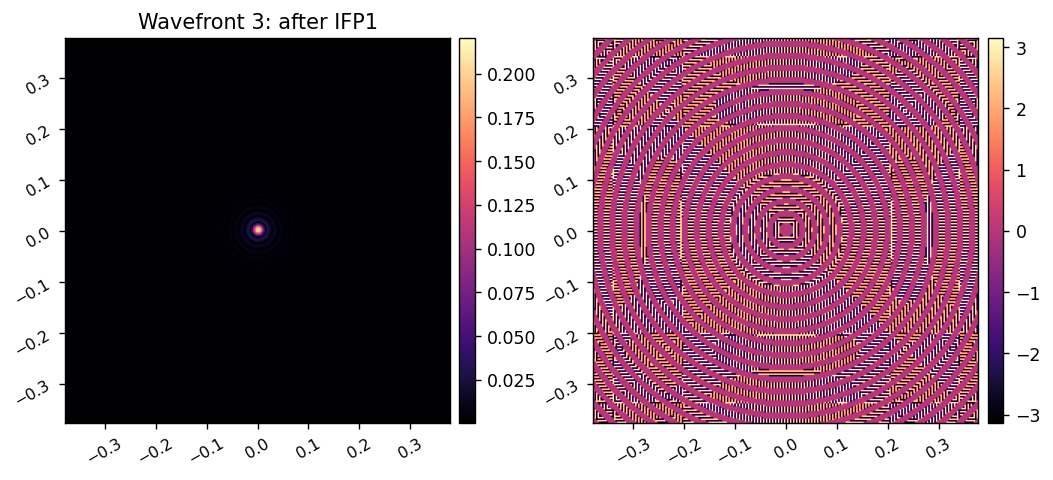

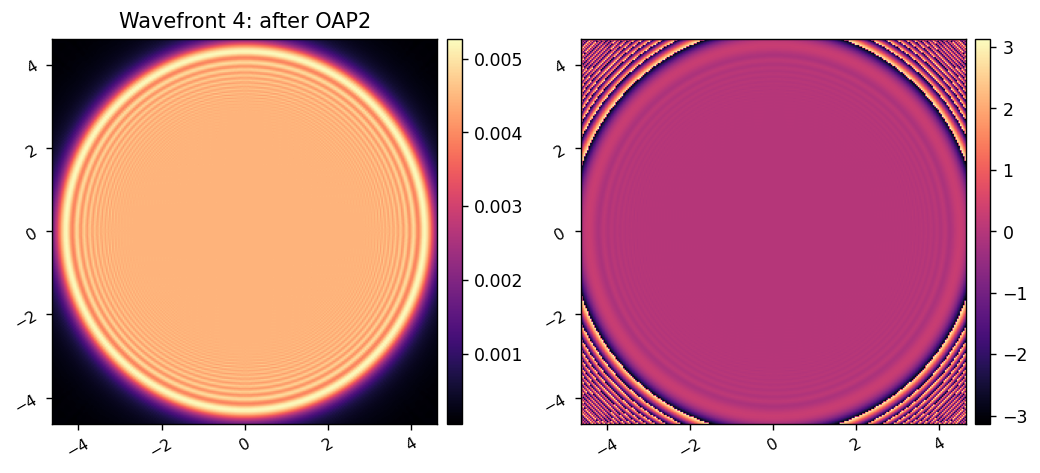

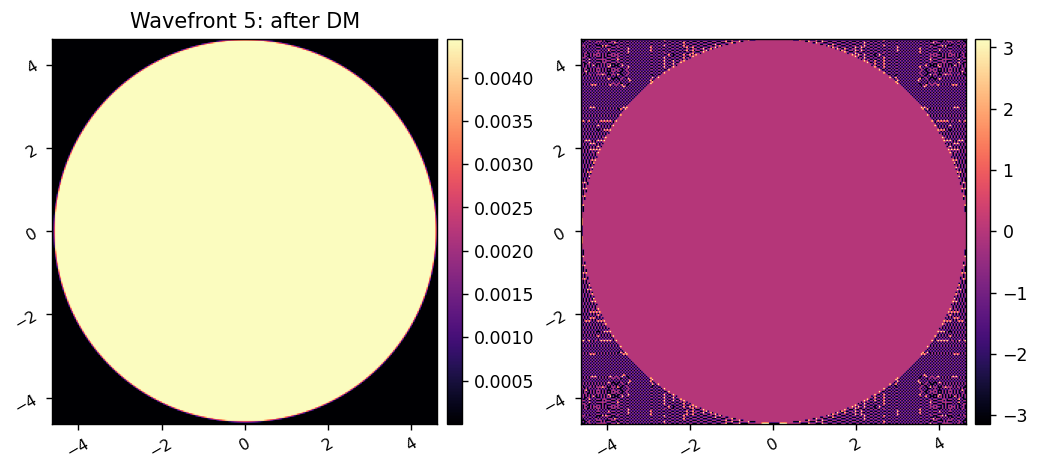

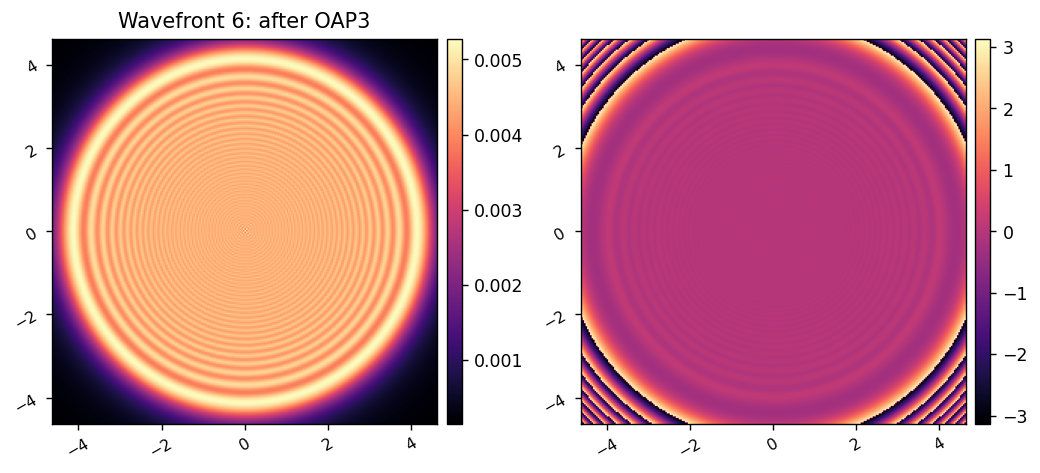

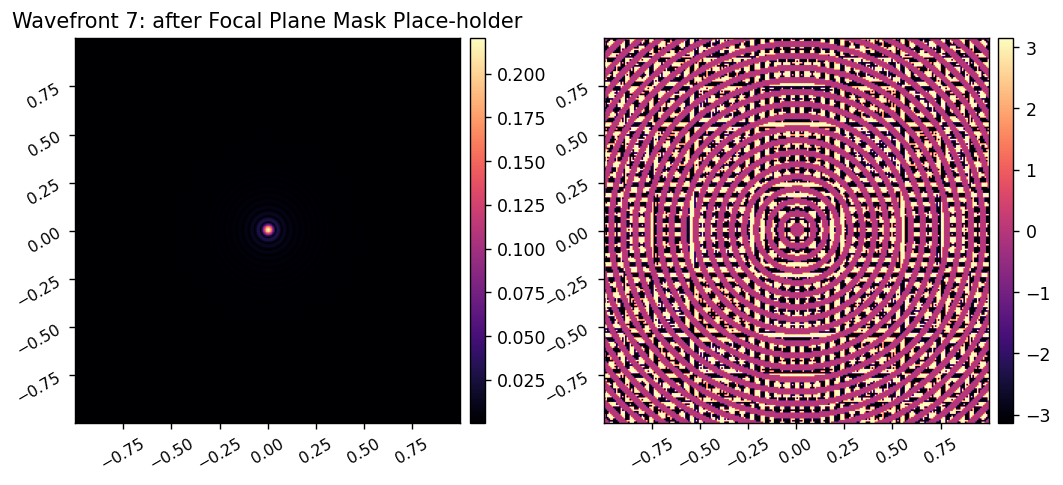

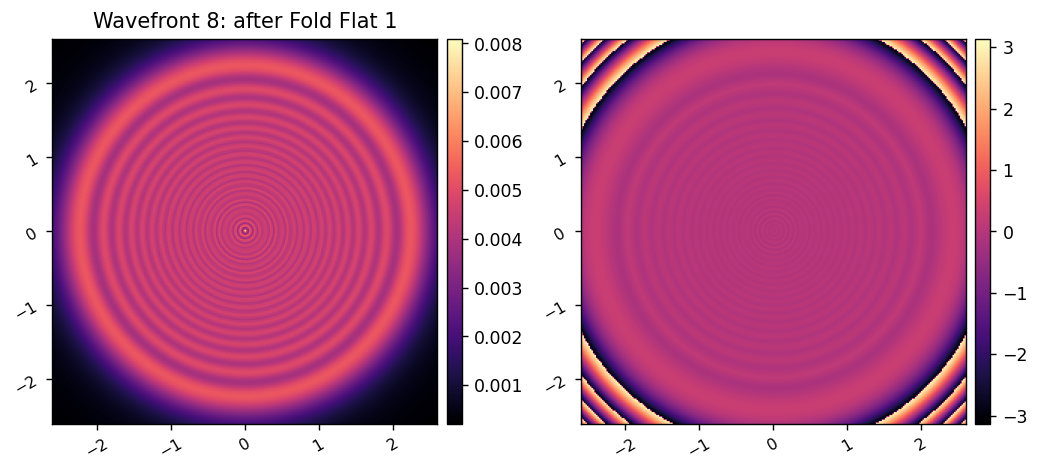

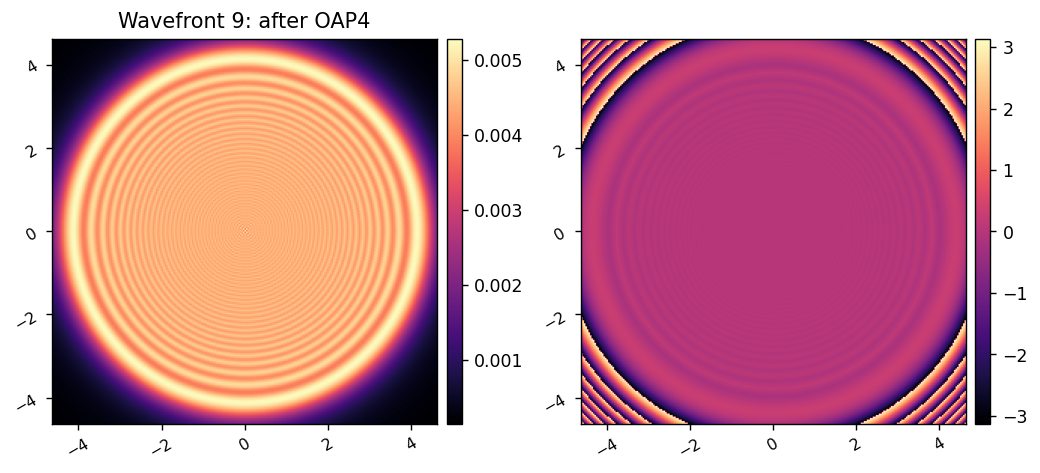

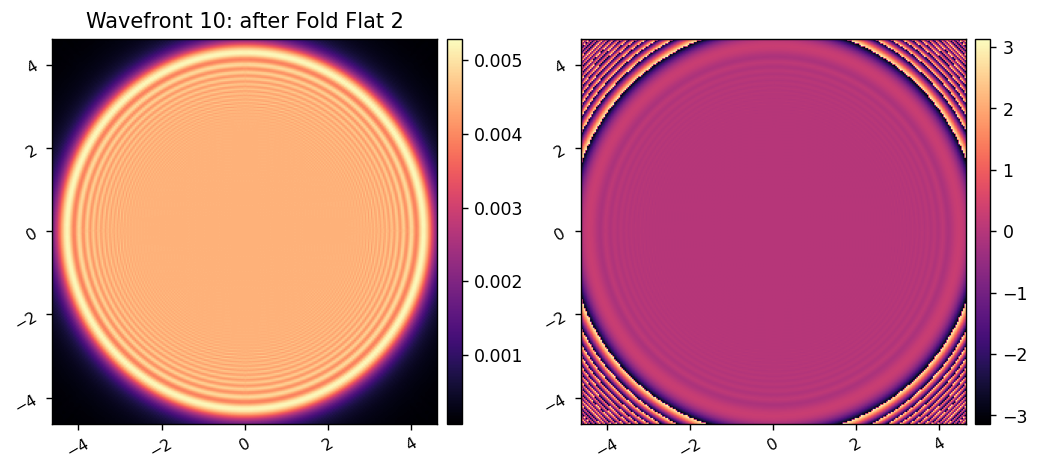

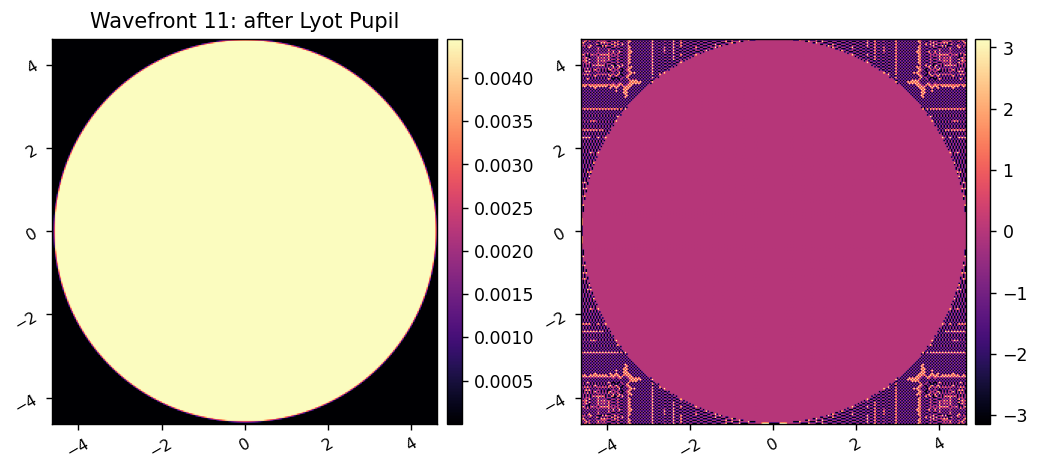

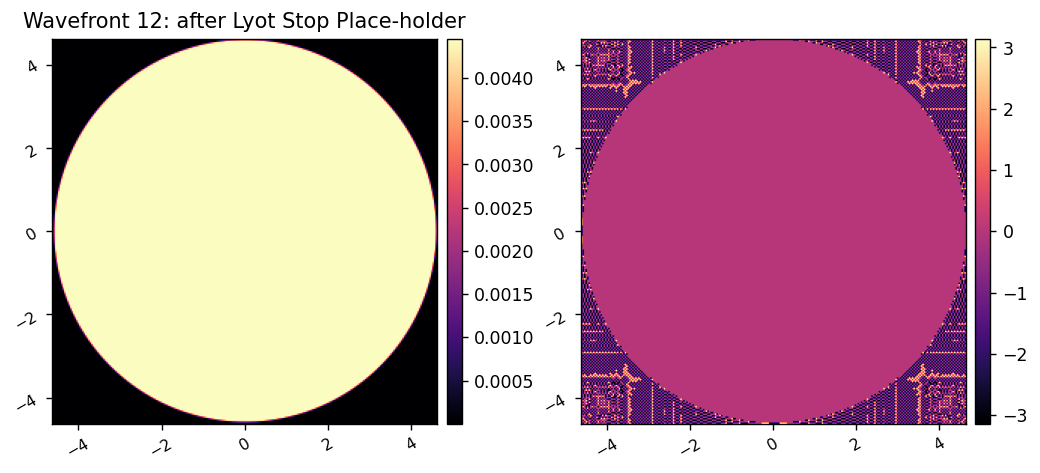

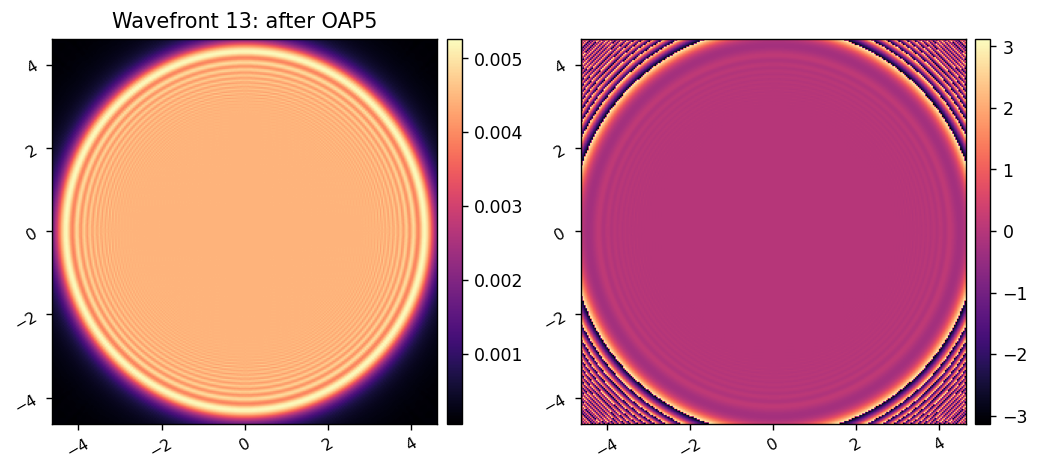

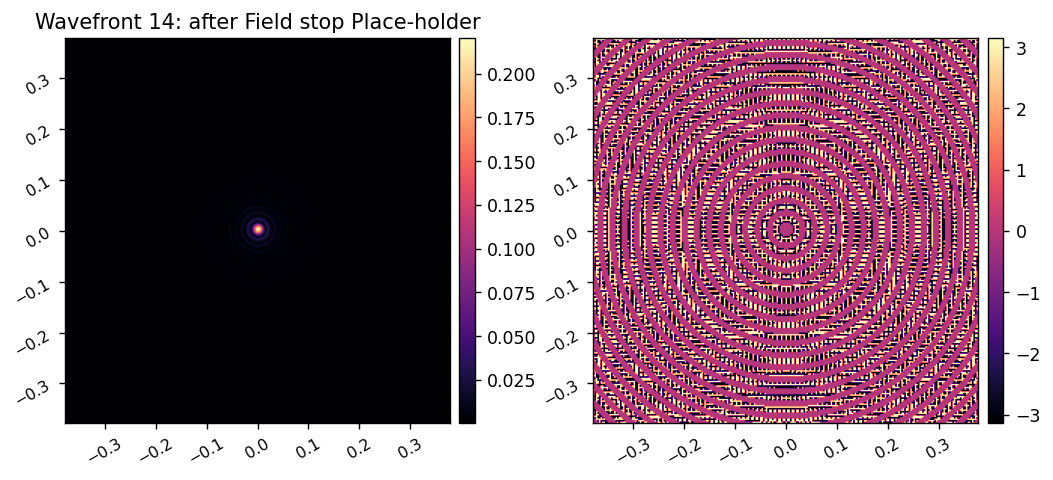

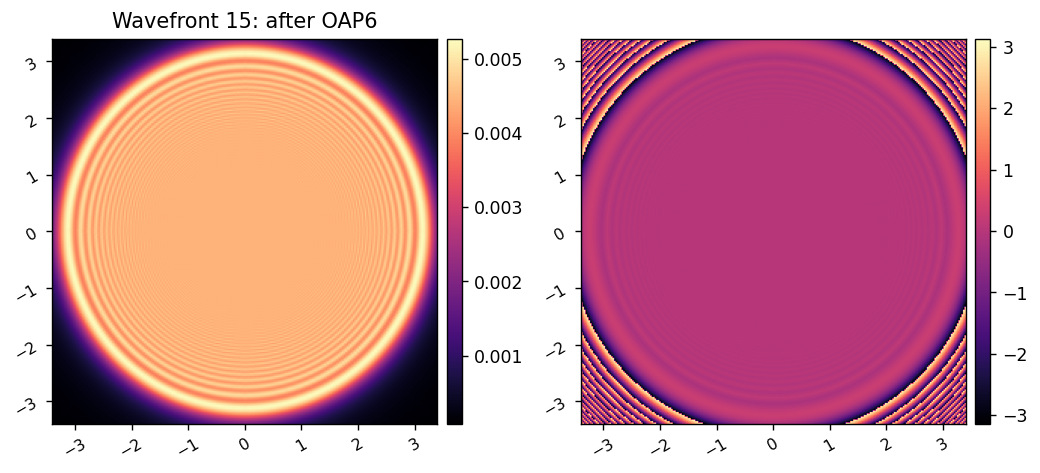

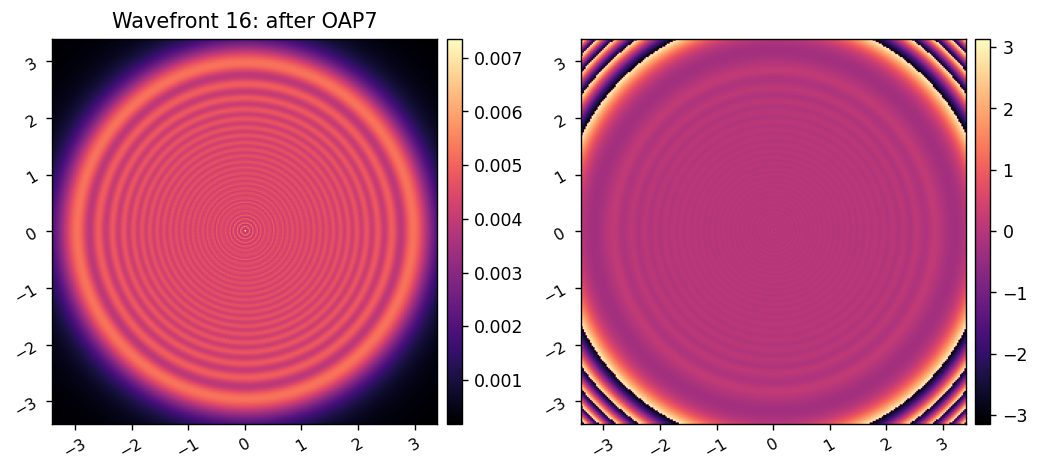

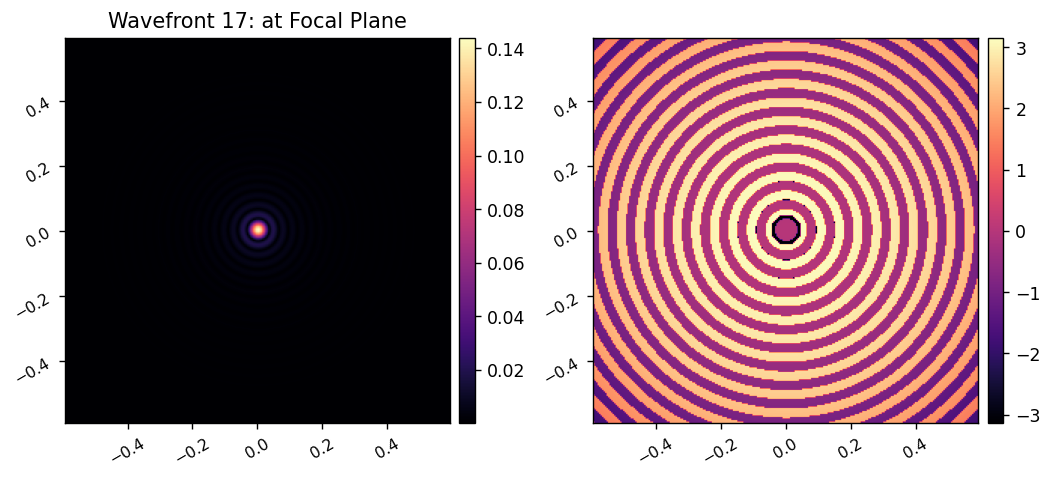

In [57]:
for i in range(len(wfs)):
    if 'focal plane' in wfs[i].location.lower() or 'detector' in wfs[i].location.lower():
        pass
    else:
        npix = model.npix
    imshow2(wfs[i].amplitude, wfs[i].phase, f'Wavefront {i}: ' + wfs[i].location, 
            npix=model.npix,
            pxscl=wfs[i].pixelscale.to(u.mm/u.pix))
    

In [60]:
wfs[12].pixelscale.to_value(u.mm/u.pix) * model.npix

9.259360081205521

In [58]:
dir(wfs[-1])

['__abstractmethods__',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_display_after_optic',
 '_display_hint_expected_nplanes',
 '_fft',
 '_image_centered',
 '_inv_fft',
 '_pixelscale_m',
 '_propagate_ptp',
 '_propagate_stw',
 '_propagate_wts',
 '_resample_wavefront_pixelscale',
 '_x',
 '_y',
 'amplitude',
 'angular_coordinates',
 'apply_image_plane_fftmft',
 'apply_lens_power',
 'as_fits',
 'coordinates',
 'copy',
 'current_plane_index',
 'diam',
 'display',
 'divergence',
 'dtype',
 'focal_length',
 'fov',
 'from_wavefront',
 'history',
 'i

In [59]:
wfs[-1].z_w0, wfs[-1].z, wfs[-1].z_w0-wfs[-1].z

(<Quantity 3.68719139 m>, <Quantity 3.68719139 m>, <Quantity 0. m>)